In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [11]:
breast_cancer_data=sklearn.datasets.load_breast_cancer()

In [12]:
print(breast_cancer_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [13]:
df=pd.DataFrame(breast_cancer_data.data,columns=breast_cancer_data.feature_names)

In [14]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df["label"]=breast_cancer_data.target

In [16]:
df.shape

(569, 31)

In [17]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [18]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [19]:
X=df.drop(columns='label',axis=1)
Y=df['label']

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=2)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
xtrains=scaler.fit_transform(xtrain)
xtests=scaler.fit_transform(xtest)

In [23]:
import tensorflow as tf

In [24]:
tf.random.set_seed(3)
from tensorflow import keras

In [25]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

In [26]:
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [27]:
history = model.fit(xtrains, ytrain, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 19ms/step - loss: 0.7083 - accuracy: 0.6259 - val_loss: 0.4233 - val_accuracy: 0.8696
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7995 - val_loss: 0.3053 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8802 - val_loss: 0.2399 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2693 - accuracy: 0.8924 - val_loss: 0.2002 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2196 - accuracy: 0.9193 - val_loss: 0.1729 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1858 - accuracy: 0.9267 - val_loss: 0.1534 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1616 - accuracy: 0.9364 - val_loss: 0.1385 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

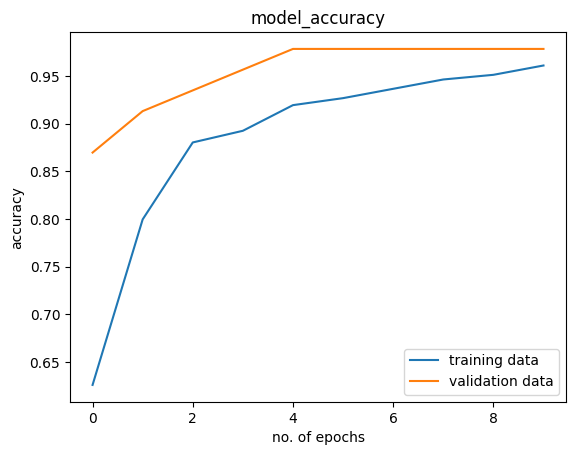

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("model_accuracy")
plt.xlabel("no. of epochs")
plt.ylabel("accuracy")

plt.legend(["training data","validation data"], loc='lower right')

In [29]:
loss,accuracy=model.evaluate(xtests,ytest)
print(accuracy,loss)

4/4 [==============================] - 0s 1ms/step - loss: 0.1211 - accuracy: 0.9561
0.9561403393745422 0.12114360928535461


In [30]:
ypred=model.predict(xtests)

4/4 [==============================] - 0s 6ms/step


In [31]:
print(ypred)

[[0.4689232  0.8479582 ]
 [0.39268175 0.5468232 ]
 [0.09302674 0.9620612 ]
 [0.9957289  0.00175047]
 [0.34366047 0.6035805 ]
 [0.95489186 0.01484817]
 [0.46449897 0.8565345 ]
 [0.03208735 0.9170569 ]
 [0.10886578 0.88604033]
 [0.05379867 0.9122092 ]
 [0.3784687  0.6413635 ]
 [0.15287998 0.8453577 ]
 [0.3807303  0.91627914]
 [0.23059696 0.79580265]
 [0.11771276 0.95933336]
 [0.8296875  0.10591108]
 [0.0630409  0.9393262 ]
 [0.14872356 0.9470251 ]
 [0.15356976 0.93858945]
 [0.91518456 0.06609724]
 [0.5954193  0.99558365]
 [0.06108518 0.85706705]
 [0.06006544 0.90240514]
 [0.04092917 0.9112549 ]
 [0.1696029  0.8027781 ]
 [0.81715167 0.14586501]
 [0.14684692 0.71682984]
 [0.25462404 0.5043585 ]
 [0.79502016 0.23336975]
 [0.8536287  0.13150236]
 [0.06782239 0.7730412 ]
 [0.12840271 0.92276937]
 [0.07047961 0.86997896]
 [0.96532416 0.00208934]
 [0.9167995  0.06544714]
 [0.1810442  0.78995526]
 [0.03566648 0.94429827]
 [0.16086596 0.7672899 ]
 [0.04232666 0.9276681 ]
 [0.12546182 0.90132207]


In [32]:
ypredl = [np.argmax(i) for i in ypred]
print(ypredl)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [33]:
input_data=(19.18,22.49,127.5,1148,0.08523,0.1428,0.1114,0.06772,0.1767,0.05529,0.4357,1.073,3.833,54.22,0.005524,0.03698,0.02706,0.01221,0.01415,0.003397,23.36,32.06,166.4,1688,0.1322,0.5601,0.3865,0.1708,0.3193,0.09221)

input_data_as_np_array=np.asarray(input_data)

input_reshaped=input_data_as_np_array.reshape(1,-1)

input_scaler=scaler.transform(input_reshaped)

prediction=model.predict(input_scaler)
print(prediction)

pred_label=[np.argmax(prediction)]
print(pred_label)

if(pred_label[0]==0):
  print("Tumour is malignant")
else:
  print("Tumour is benign")


1/1 [==============================] - 0s 16ms/step
[[0.89961725 0.10528858]]
[0]
Tumour is malignant


C:\Anaconda\envs\tfenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
